# Limits of Diversification 
(incl the anatomy of a cap-weighted Portfolio, and a bunch cool Pandas stuff)

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 
import edhec_risk_kit as erk
import pandas as pd 
import numpy as np 

ind_return = erk.get_ind_returns()
ind_nfirms = erk.get_ind_nfirms()
ind_size = erk.get_ind_size()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
ind_return.shape

(1110, 30)

In [11]:
ind_size.shape

(1110, 30)

In [13]:
ind_nfirms.shape

(1110, 30)

In [14]:
ind_nfirms.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-08,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-09,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-10,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-11,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4


In [15]:
ind_mktcap = ind_nfirms*ind_size
ind_mktcap.shape

(1110, 30)

<AxesSubplot:>

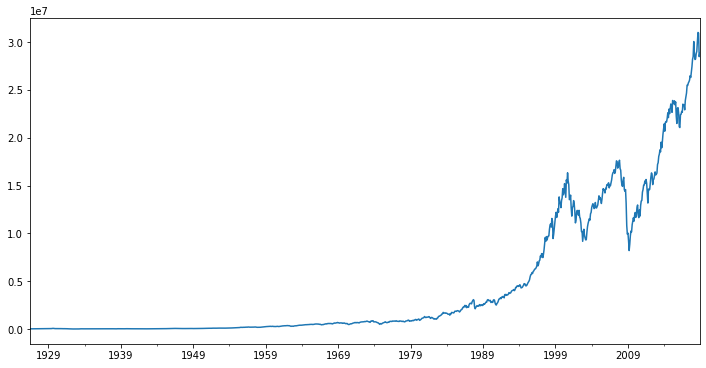

In [19]:
total_mktcap=ind_mktcap.sum(axis = 1)
total_mktcap.plot(figsize = (12, 6))

In [20]:
ind_capweight = ind_mktcap.divide(total_mktcap, axis ="rows")

In [21]:
ind_capweight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


In [23]:
ind_capweight["1926"].sum(axis = 1)

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

<AxesSubplot:>

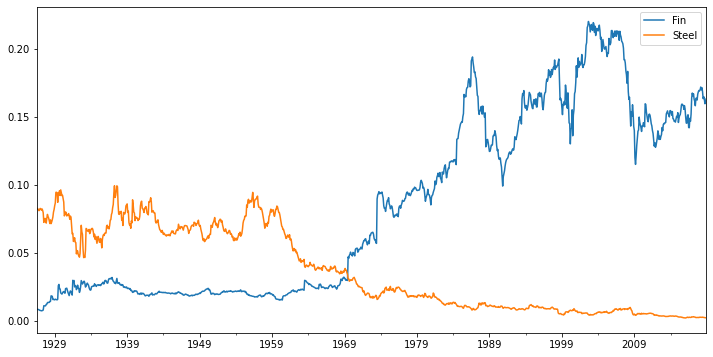

In [24]:
ind_capweight[["Fin", "Steel"]].plot(figsize=(12, 6))

In [31]:
total_market_return = (ind_capweight*ind_return).sum(axis=1)

<AxesSubplot:title={'center':'Total Market \\CapWeighted Index'}>

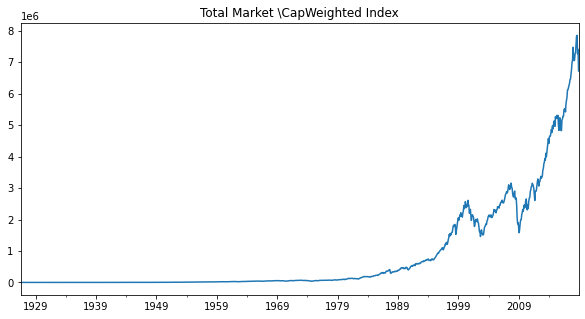

In [33]:
total_market_index = erk.drawdown(total_market_return).Wealth
total_market_index.plot(figsize = (10, 5), title="Total Market \CapWeighted Index")

<AxesSubplot:>

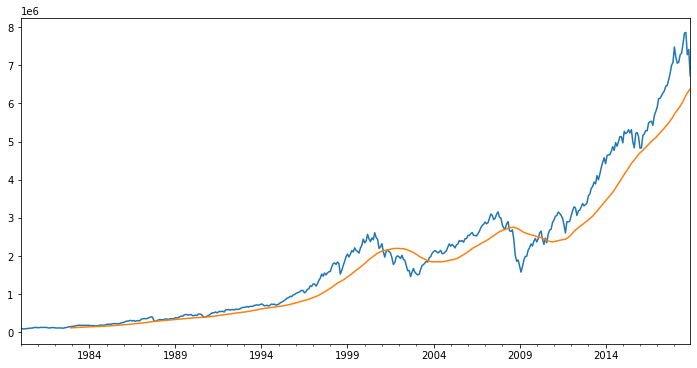

In [39]:
total_market_index["1980":].plot(figsize=(12, 6))
total_market_index["1980":].rolling(window=36).mean().plot(figsize=(12,6))

<AxesSubplot:>

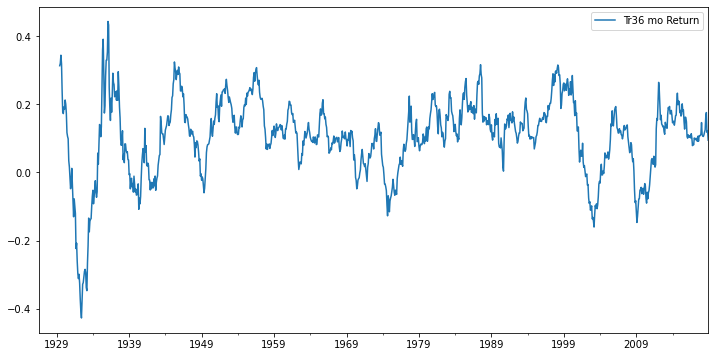

In [48]:
tmi_tr36rets = total_market_return.rolling(window = 36).aggregate(
erk.annualize_rets, periods_per_year=12)
tmi_tr36rets.plot(figsize=(12, 6), label = "Tr36 mo Return", legend = True)
#total_market_return.plot(label = "Returns", legend = True)

In [47]:
tmi_tr36rets.tail()

2018-08    0.162543
2018-09    0.175679
2018-10    0.117769
2018-11    0.122645
2018-12    0.094723
Freq: M, dtype: float64

###  Rolling Correlation - along wiht MultiIndexes and .groupby

In [56]:
ts_corr = ind_return.rolling(window=36).corr()

In [57]:
ts_corr.tail(30)

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Food   1.000000  0.787976  0.609644  0.197211  0.495224  0.707411   
        Beer   0.787976  1.000000  0.593576  0.082388  0.400077  0.839933   
        Smoke  0.609644  0.593576  1.000000 -0.103376  0.113759  0.497822   
        Games  0.197211  0.082388 -0.103376  1.000000  0.471300  0.031068   
        Books  0.495224  0.400077  0.113759  0.471300  1.000000  0.432074   
        Hshld  0.707411  0.839933  0.497822  0.031068  0.432074  1.000000   
        Clths  0.327034  0.269810  0.039664  0.462349  0.610799  0.297953   
        Hlth   0.407283  0.456592  0.059386  0.450193  0.613623  0.496063   
        Chems  0.340513  0.282485 -0.037894  0.547198  0.635248  0.290368   
        Txtls  0.309498  0.360703 -0.009912  0.566678  0.658773  0.419974   
        Cnstr  0.410664  0.370825  0.080413  0.532265  0.755895  0.419737   
        Steel  0.140135  0.202348  0.091147  0.385392  0.581605  0.126741   
        FabPr  0.278096  0.307260  0.062256  0.510753  0.668107  0.315335   
        ElcEq  0.358076  0.371723  0.142186  0.513698  0.637870  0.392790   
        Autos  0.362145  0.211867  0.069551  0.468919  0.659946  0.242159   
        Carry  0.320122  0.290059  0.186757  0.561239  0.554996  0.163757   
        Mines  0.179416  0.169539  0.113891  0.315191  0.471742  0.112793   
        Coal  -0.011617 -0.041613 -0.070056  0.180591  0.431137 -0.049179   
        Oil    0.346720  0.244594  0.017933  0.384180  0.620038  0.152979   
        Util   0.607385  0.618756  0.324855 -0.029396  0.159434  0.532960   
        Telcm  0.660558  0.536346  0.393499  0.265880  0.626172  0.602575   
        Servs  0.379935  0.346986  0.042886  0.793025  0.466378  0.264350   
        BusEq  0.251012  0.249041  0.109223  0.659367  0.356944  0.217853   
        Paper  0.540515  0.553548  0.229130  0.430254  0.649448  0.539681   
        Trans  0.313931  0.324922  0.131016  0.481098  0.653684  0.367868   
        Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Food   0.327034  0.407283  0.340513  0.309498  ...  0.660558   
        Beer   0.269810  0.456592  0.282485  0.360703  ...  0.536346   
        Smoke  0.039664  0.059386 -0.037894 -0.009912  ...  0.393499   
        Games  0.462349  0.450193  0.547198  0.566678  ...  0.265880   
        Books  0.610799  0.613623  0.635248  0.658773  ...  0.626172   
        Hshld  0.297953  0.496063  0.290368  0.419974  ...  0.602575   
        Clths  1.000000  0.511052  0.440838  0.548744  ...  0.375840   
        Hlth   0.511052  1.000000  0.690869  0.601138  ...  0.498431   
        Chems  0.440838  0.690869  1.000000  0.733256  ...  0.370660   
        Txtls  0.548744  0.601138  0.733256  1.000000  ...  0.410219   
        Cnstr  0.501667  0.671989  0.899989  0.789727  ...  0.483020   
        Steel  0.338109  0.529043  0.708448  0.457639  ...  0.474117   
        FabPr  0.340554  0.610680  0.868884  0.709613  ...  0.417700   
        ElcEq  0.471023  0.728840  0.879373  0.650947  ...  0.484016   
        Autos  0.243125  0.566244  0.750474  0.526524  ...  0.415564   
        Carry  0.404721  0.678743  0.699209  0.502156  ...  0.433818   
        Mines  0.162128  0.257773  0.526747  0.396572  ...  0.462532   
        Coal   0.144628  0.158415  0.304828  0.218558  ...  0.319431   
        Oil    0.444282  0.423581  0.598473  0.375877  ...  0.458203   
        Util   0.057575  0.155597  0.113895  0.166922  ...  0.343616   
        Telcm  0.375840  0.498431  0.370660  0.410219  ...  1.000000   
        Servs  0.439021  0.659770  0.621297  0.

In [58]:
ind_return.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [60]:
ts_corr.index.names = ["Date", "Industry"]

In [61]:
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
Date    Industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
Date    Industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
Date    Industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
Date    Industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [67]:
ind_tr36corr = ts_corr.groupby(level="Date").apply(lambda cormat:
                                                  cormat.values.mean())

<AxesSubplot:xlabel='Date'>

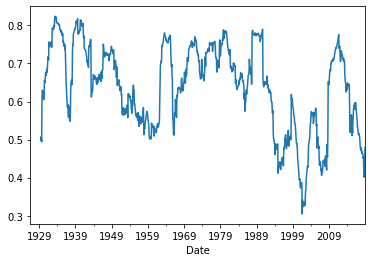

In [69]:
ind_tr36corr.plot()

<AxesSubplot:label='b381108d-e91e-4217-9422-fa2283e32ff2'>

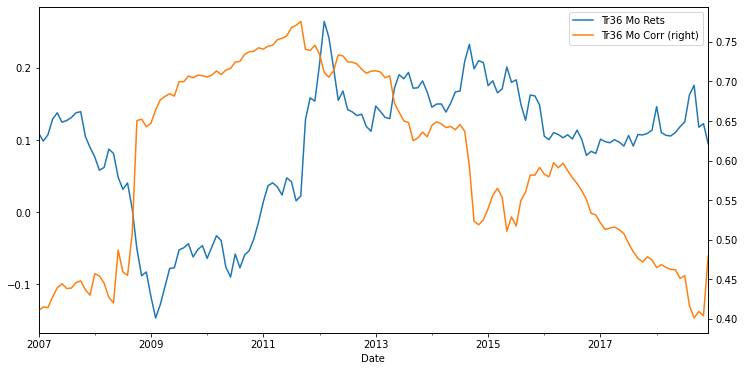

In [77]:
tmi_tr36rets["2007":].plot(label="Tr36 Mo Rets", figsize=(12,6), legend=True)
ind_tr36corr["2007":].plot(label="Tr36 Mo Corr", legend=True, secondary_y=True)

In [78]:
tmi_tr36rets.corr(ind_tr36corr)

-0.28010065062884115

When Markets are crashing, the correlation between all the stocks rise.
That's the problem with diversification...